# Set Environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install ultralytics==8.0.134 opencv-python==4.8.0.74 roboflow --quiet

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
from IPython.display import display, Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


# Download custom dataset from roboflow

Dataset Link: https://universe.roboflow.com/smart-football-object-detection/smart-football-object-detection

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="***")
project = rf.workspace("smart-football-object-detection").project("smart-football-object-detection")
dataset = project.version(11).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Smart-Football:-Object-Detection-11 in yolov8:: 100%|██████████| 25634/25634 [00:05<00:00, 4827.78it/s]


# Train Custom model

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 72.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Smart-Football:-Object-Detection-11/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

# Visualize training results

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch10561.jpg
confusion_matrix.png				     train_batch10562.jpg
events.out.tfevents.1694035042.ea4be71441ba.11407.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch10560.jpg				     weights


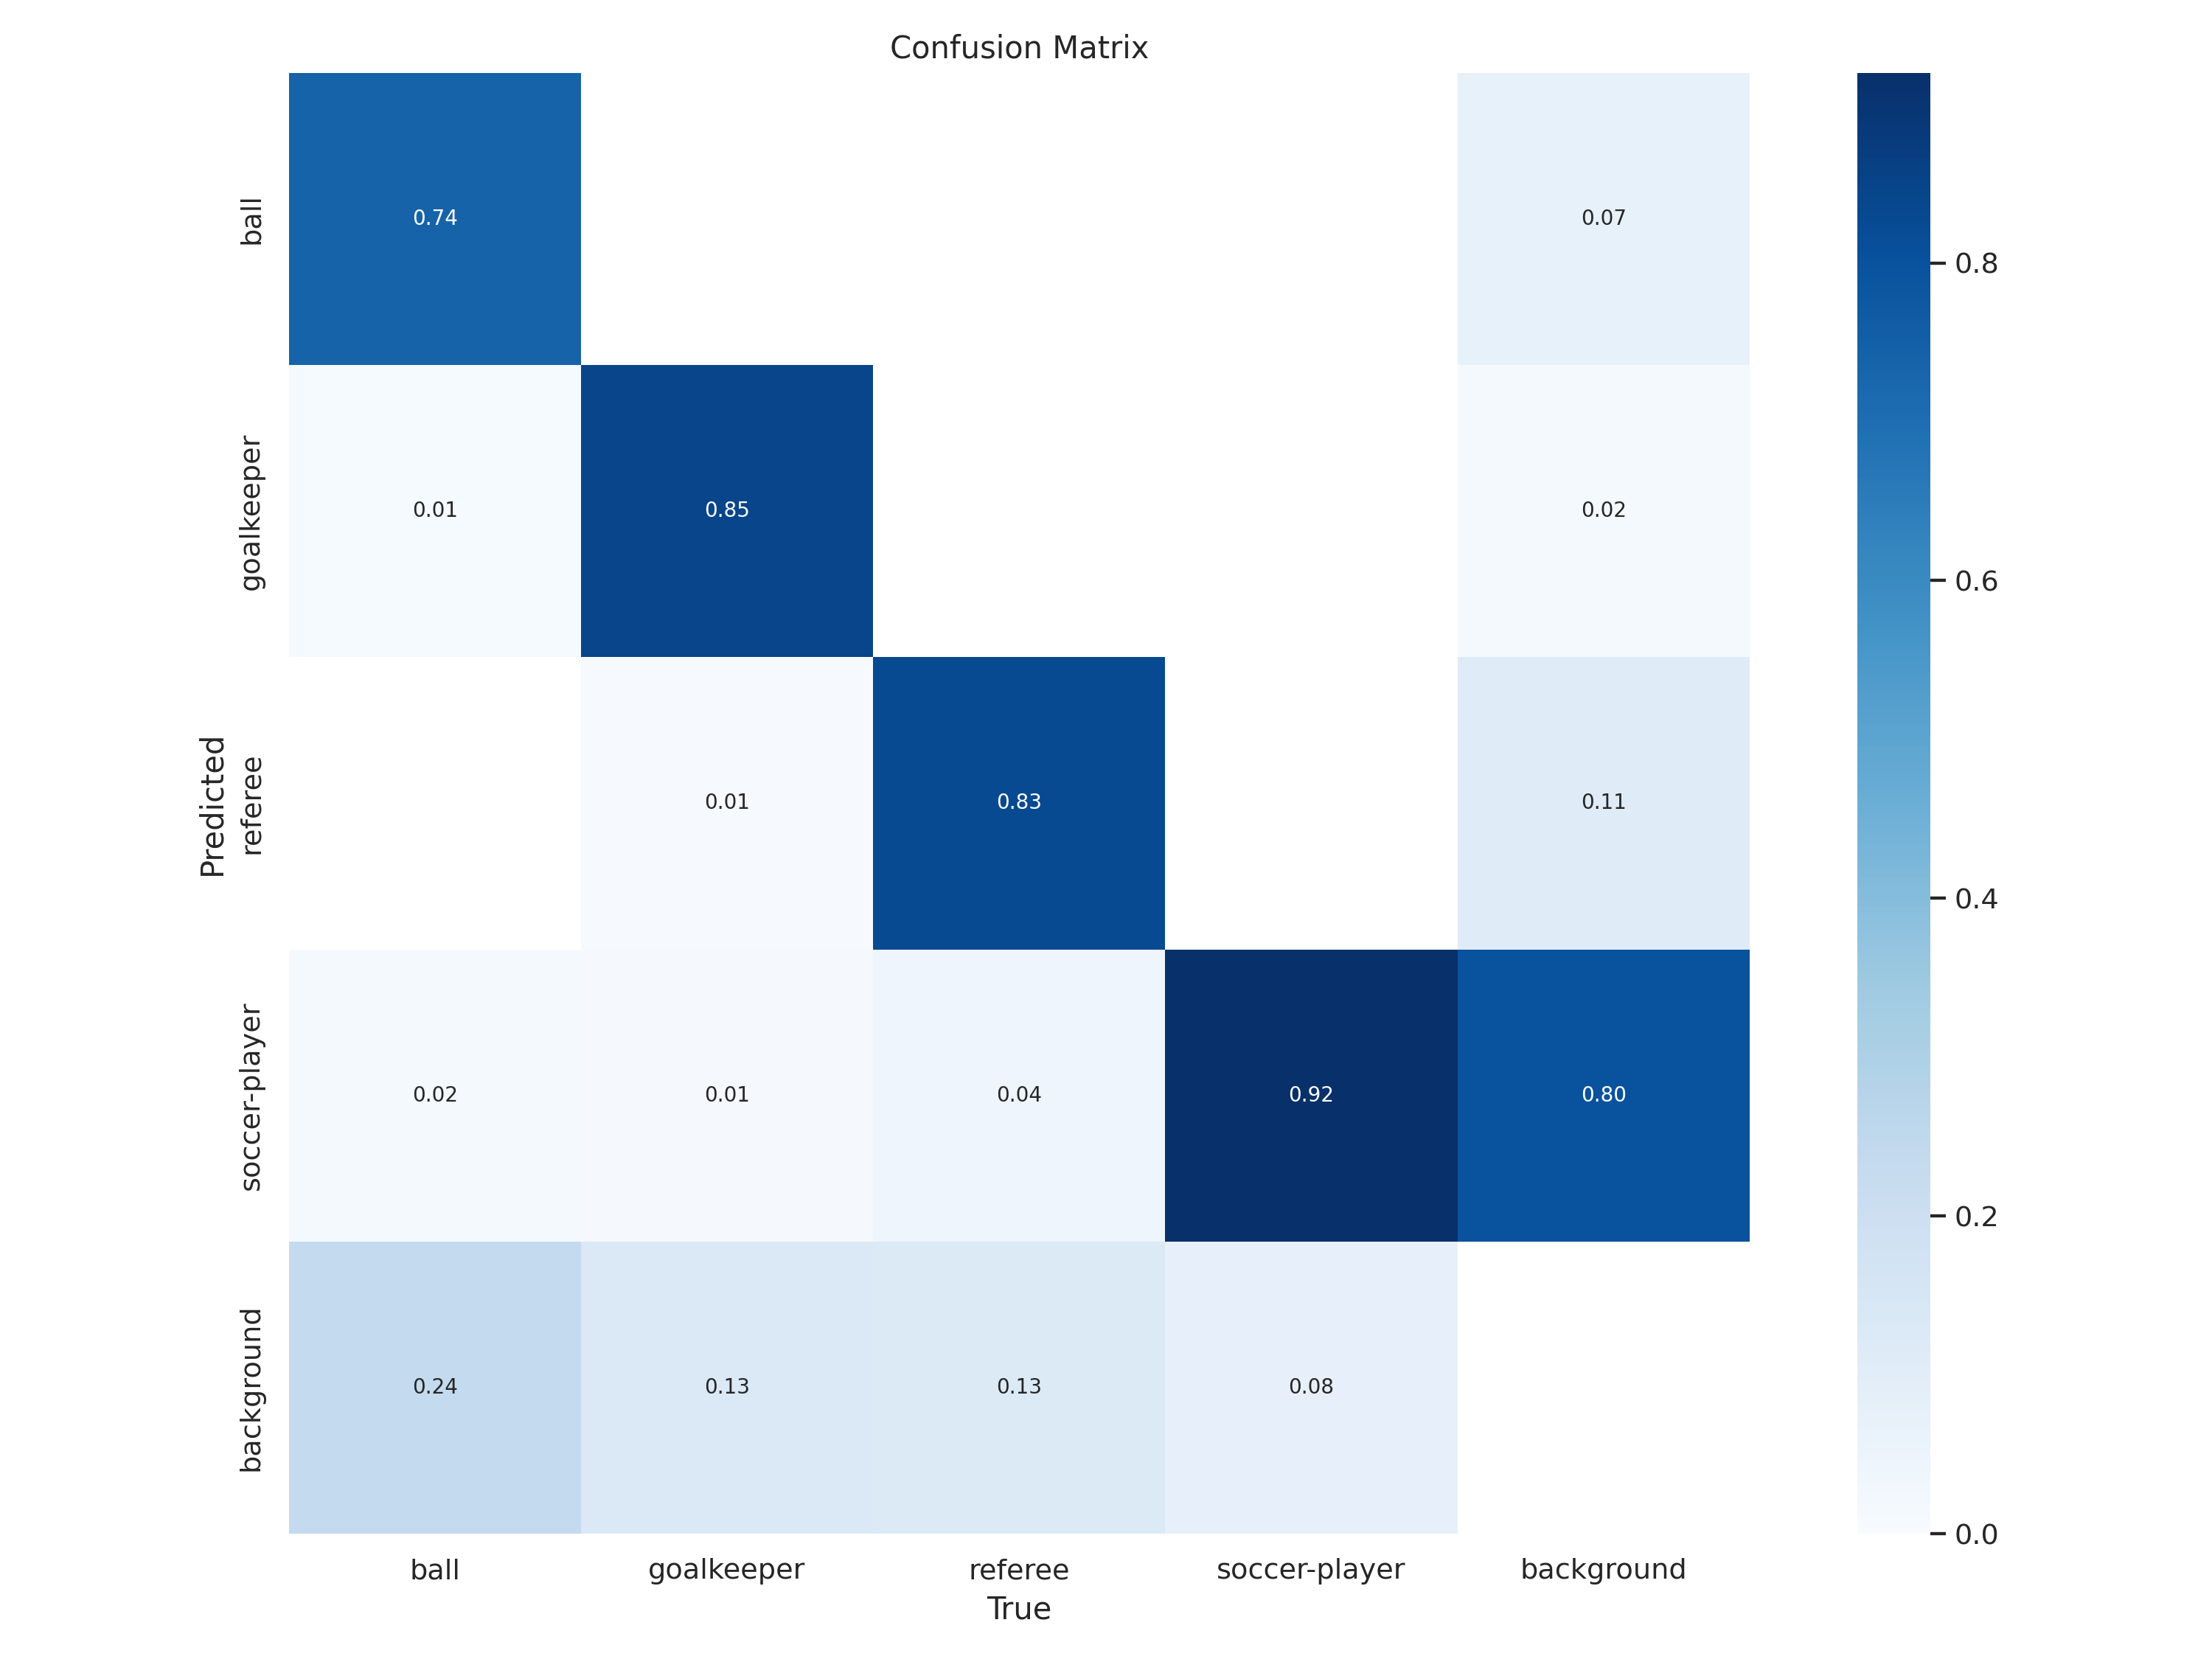

In [ ]:
# Confusion Matrix
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

There is no significant confusion between any two classes, indicating that the model has successfully learned to distinguish between our classes.

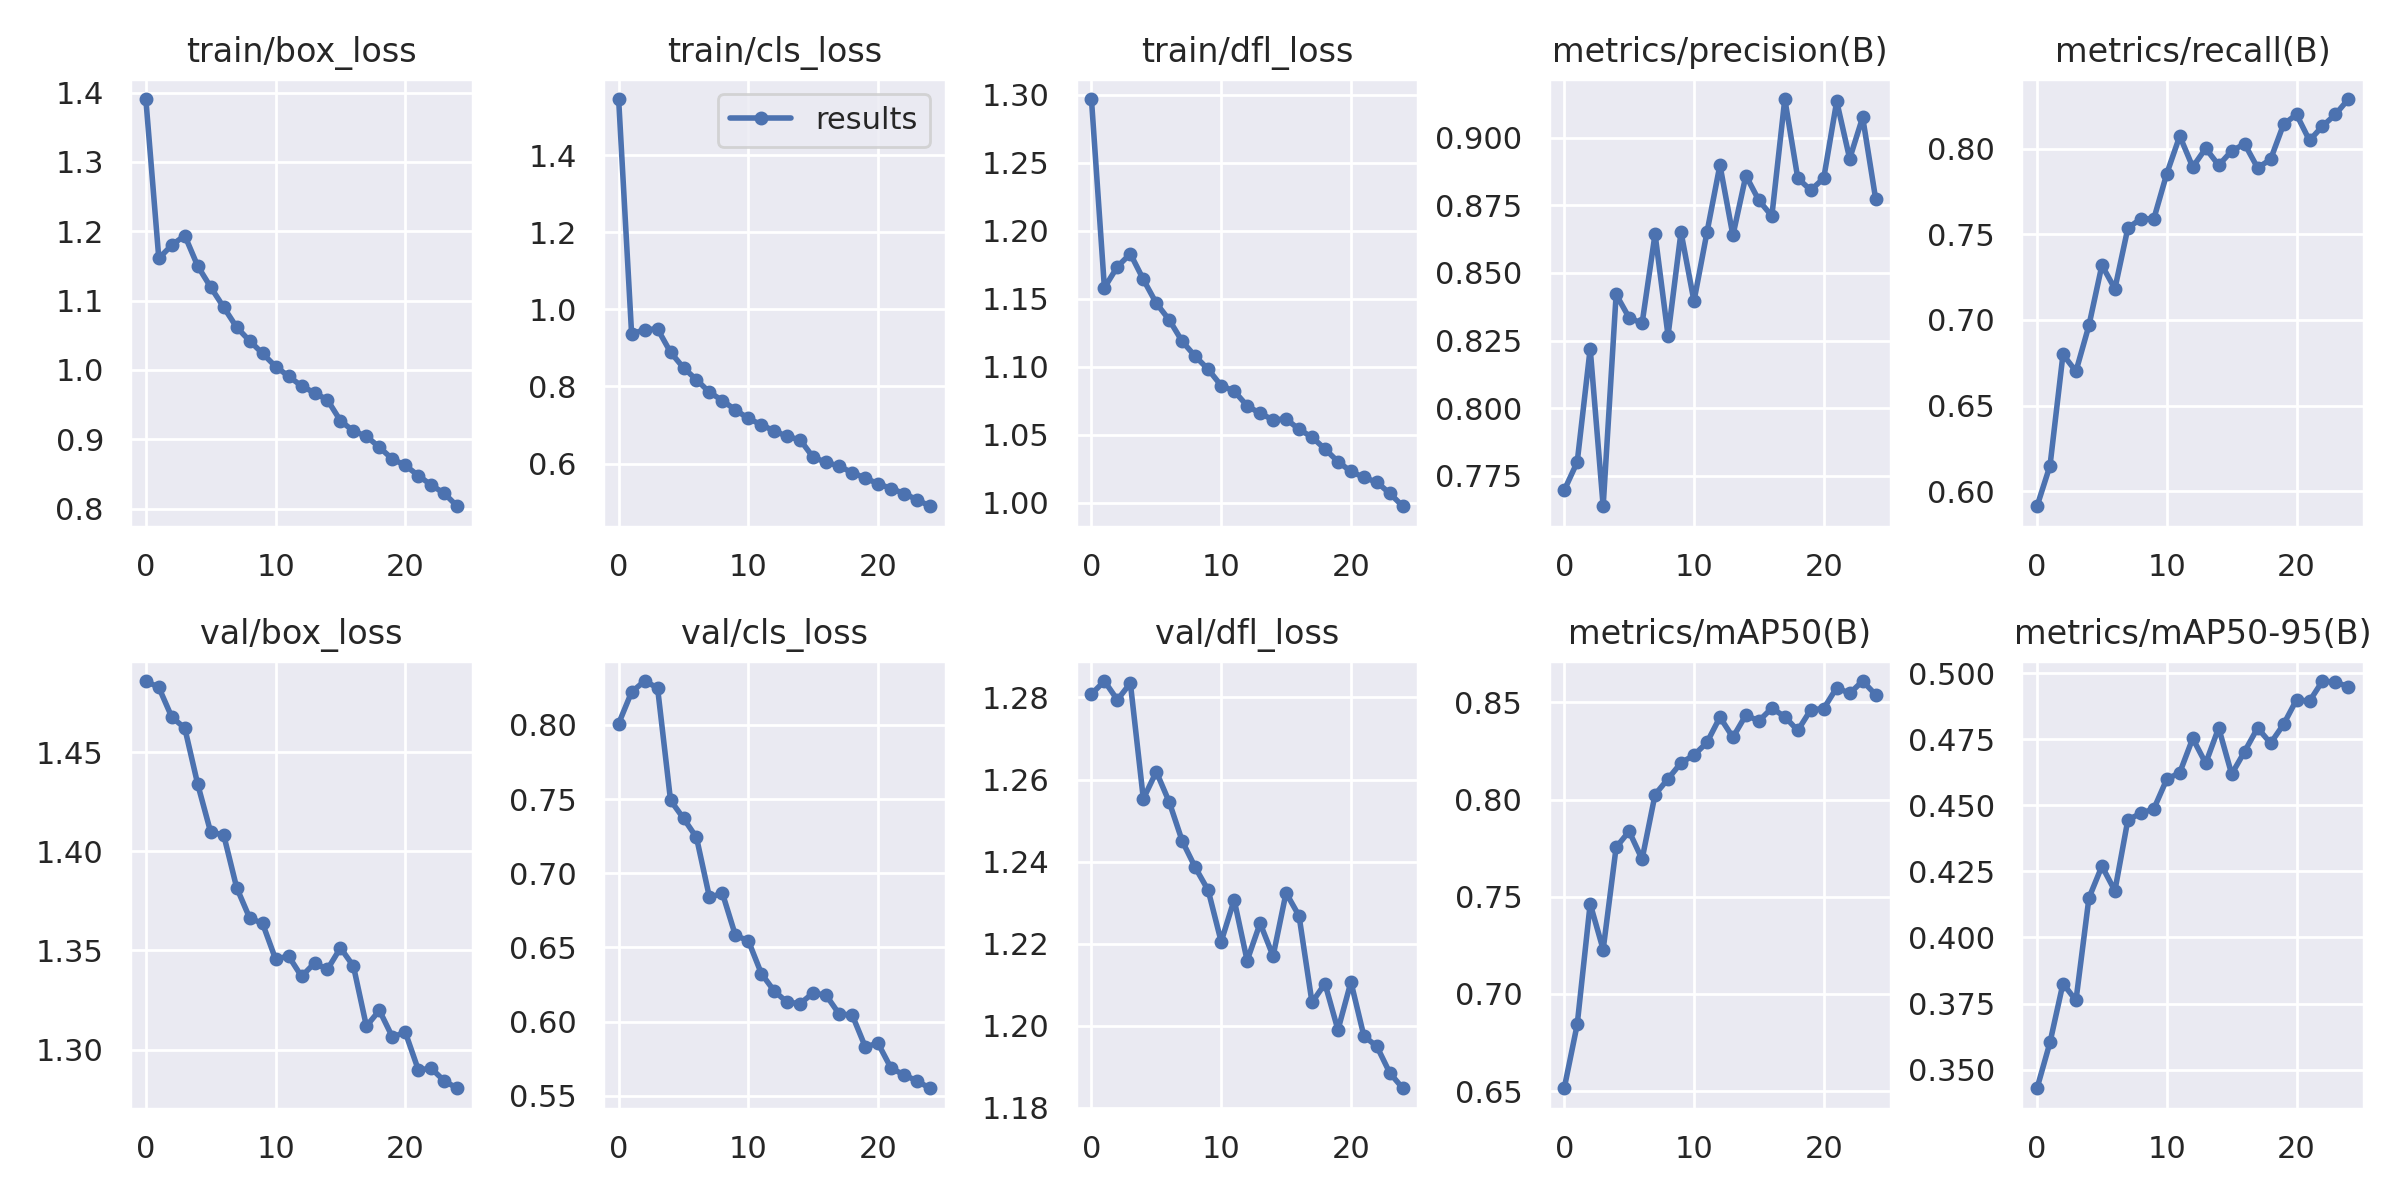

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

* The **box_loss** measures the error in predicted bounding box coordinates and dimensions, with a lower value indicating more accurate predictions.
* The **cls_loss** measures the error in predicted class probabilities, with a lower value indicating more accurate class predictions.
* The **dfl_loss** measures the error in deformable convolution layers, which help detect objects with different scales and aspect ratios, and a lower value indicates better handling of object deformations and variations.

The losses and metrics for both the training and validation are quite similar and fall within acceptable ranges.

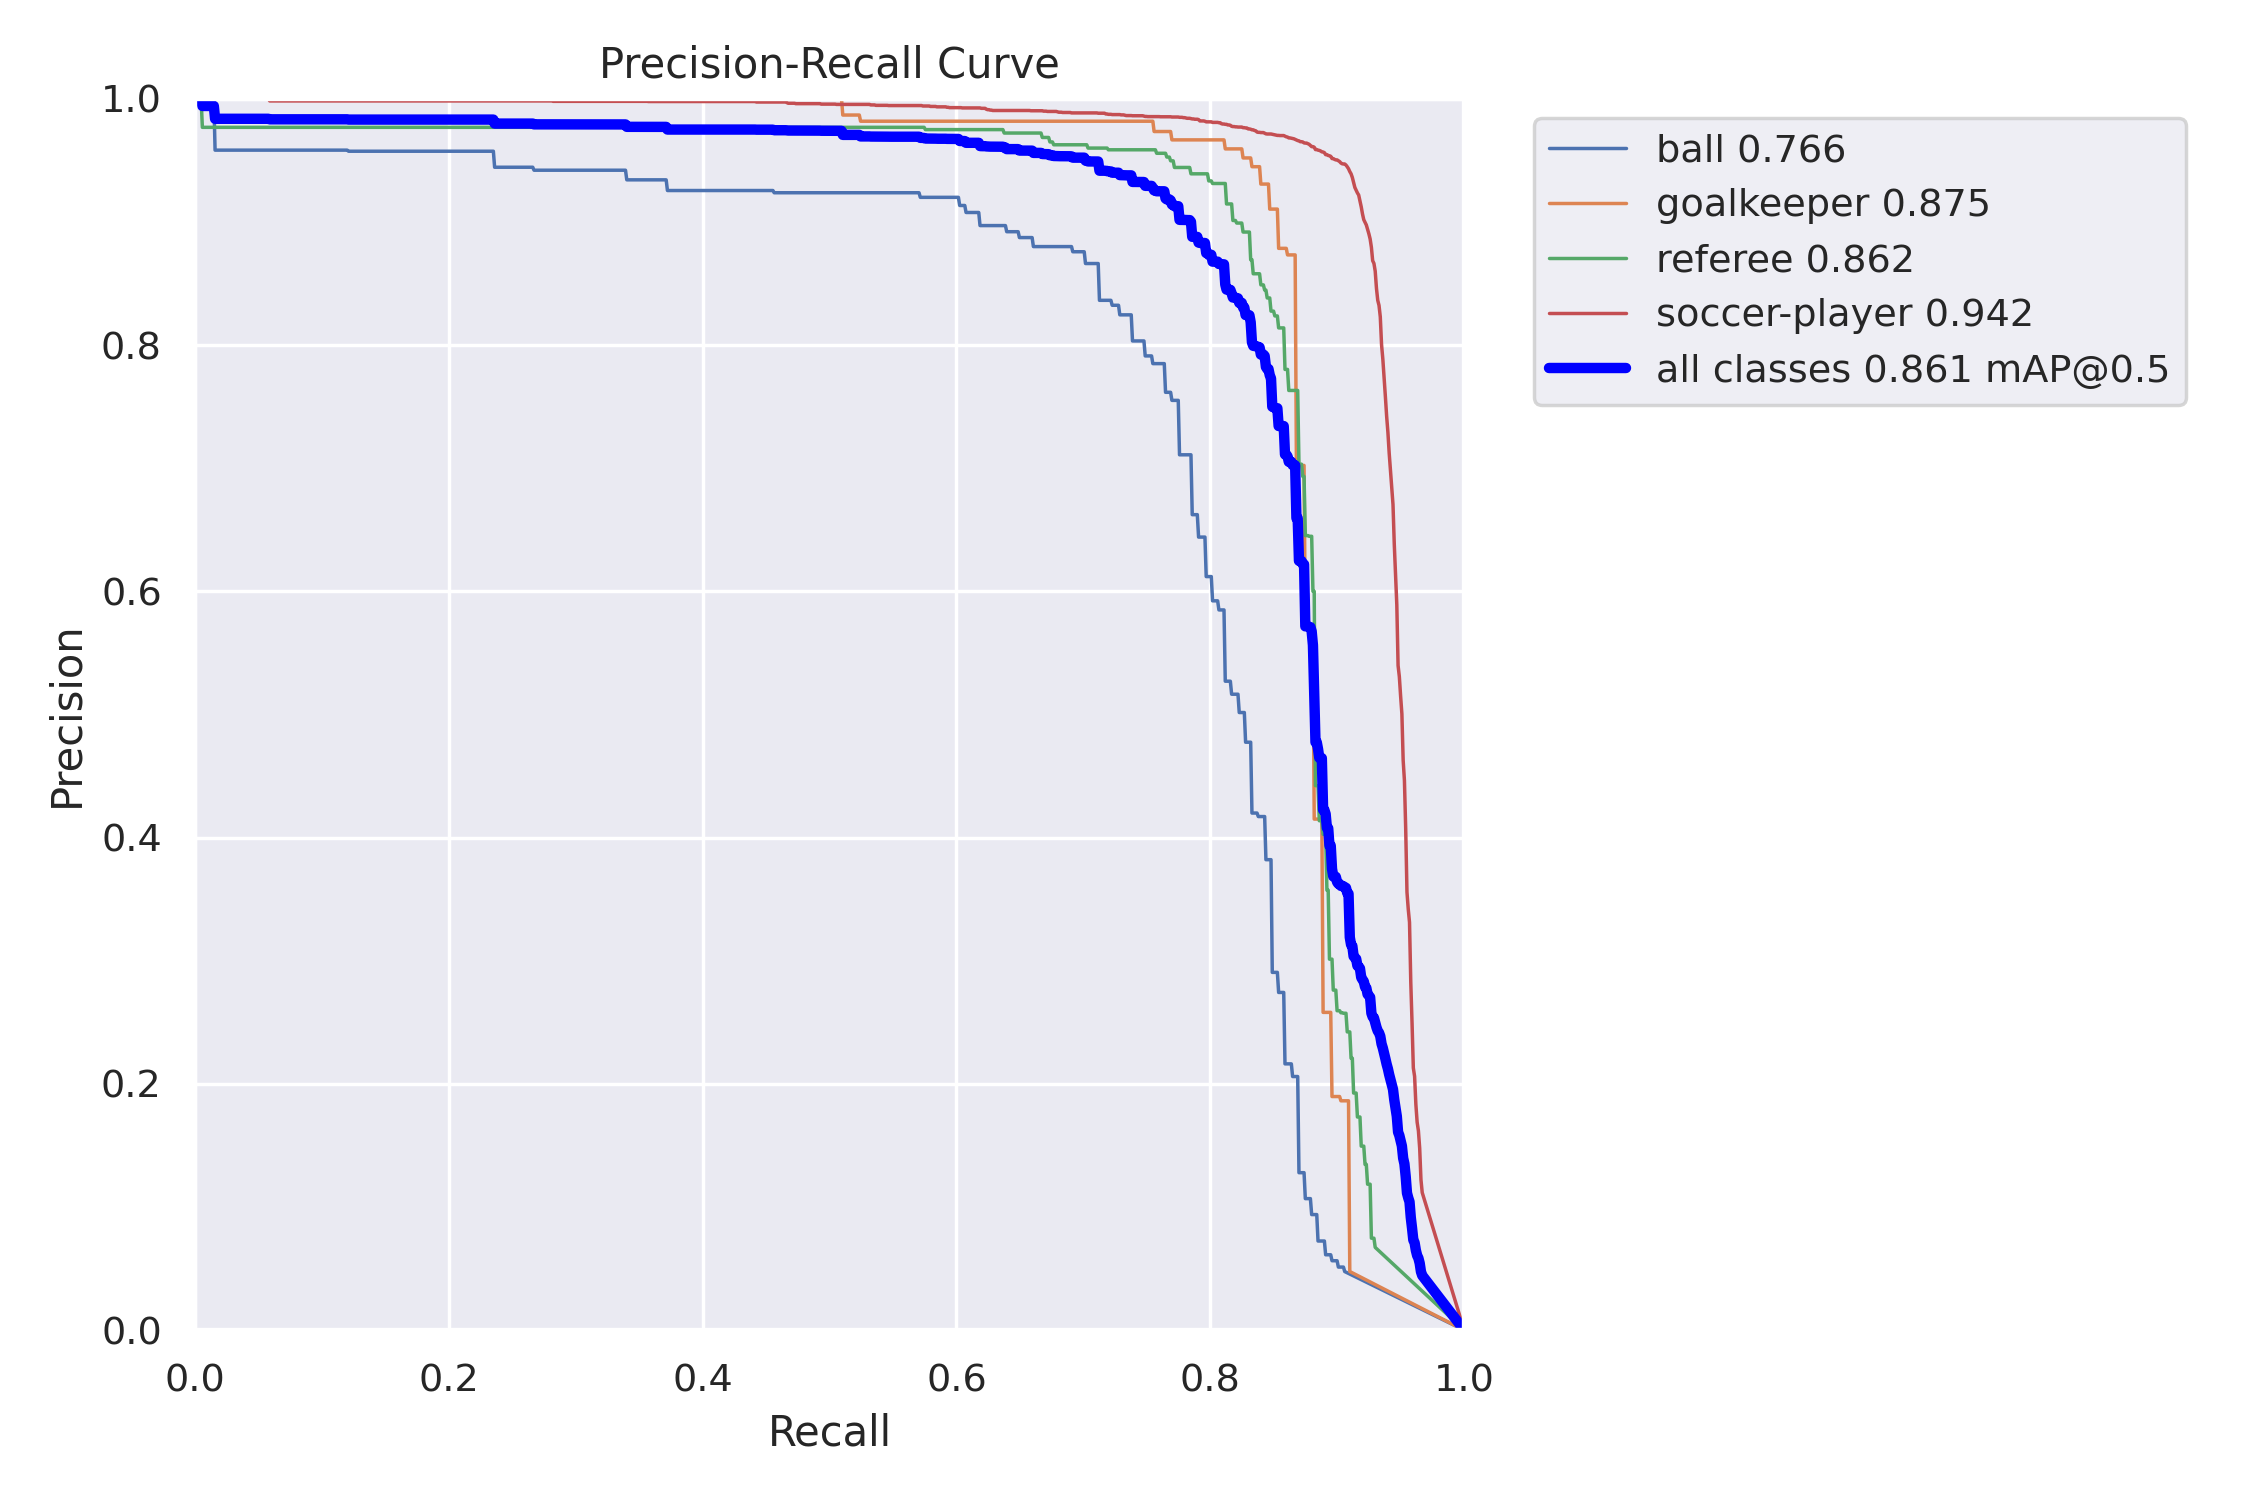

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

The precision-recall curve illustrates the balance between precision and recall at various thresholds. A large area under the curve indicates high precision and high recall. High precision is associated with a low false positive rate, while high recall is associated with a low false negative rate. In our case, this model is performing quite well.

# Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 26.4MB/s]
val: Scanning /content/datasets/Smart-Football:-Object-Detection-11/valid/labels... 1002 images, 41 backgrounds, 0 corrupt: 100% 1002/1002 [00:00<00:00, 2274.37it/s]
val: New cache created: /content/datasets/Smart-Football:-Object-Detection-11/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:27<00:00,  2.27it/s]
                   all       1002       4831      0.909      0.817       0.86      0.496
                  ball       1002        191      0.869      0.686      0.754        0.3
            goalkeeper       1002        143      0.938      0.846      0.883      0.529
               referee       1002        367      0.886      0.828      0.861      0.547
         soccer-player       1002       4130      0

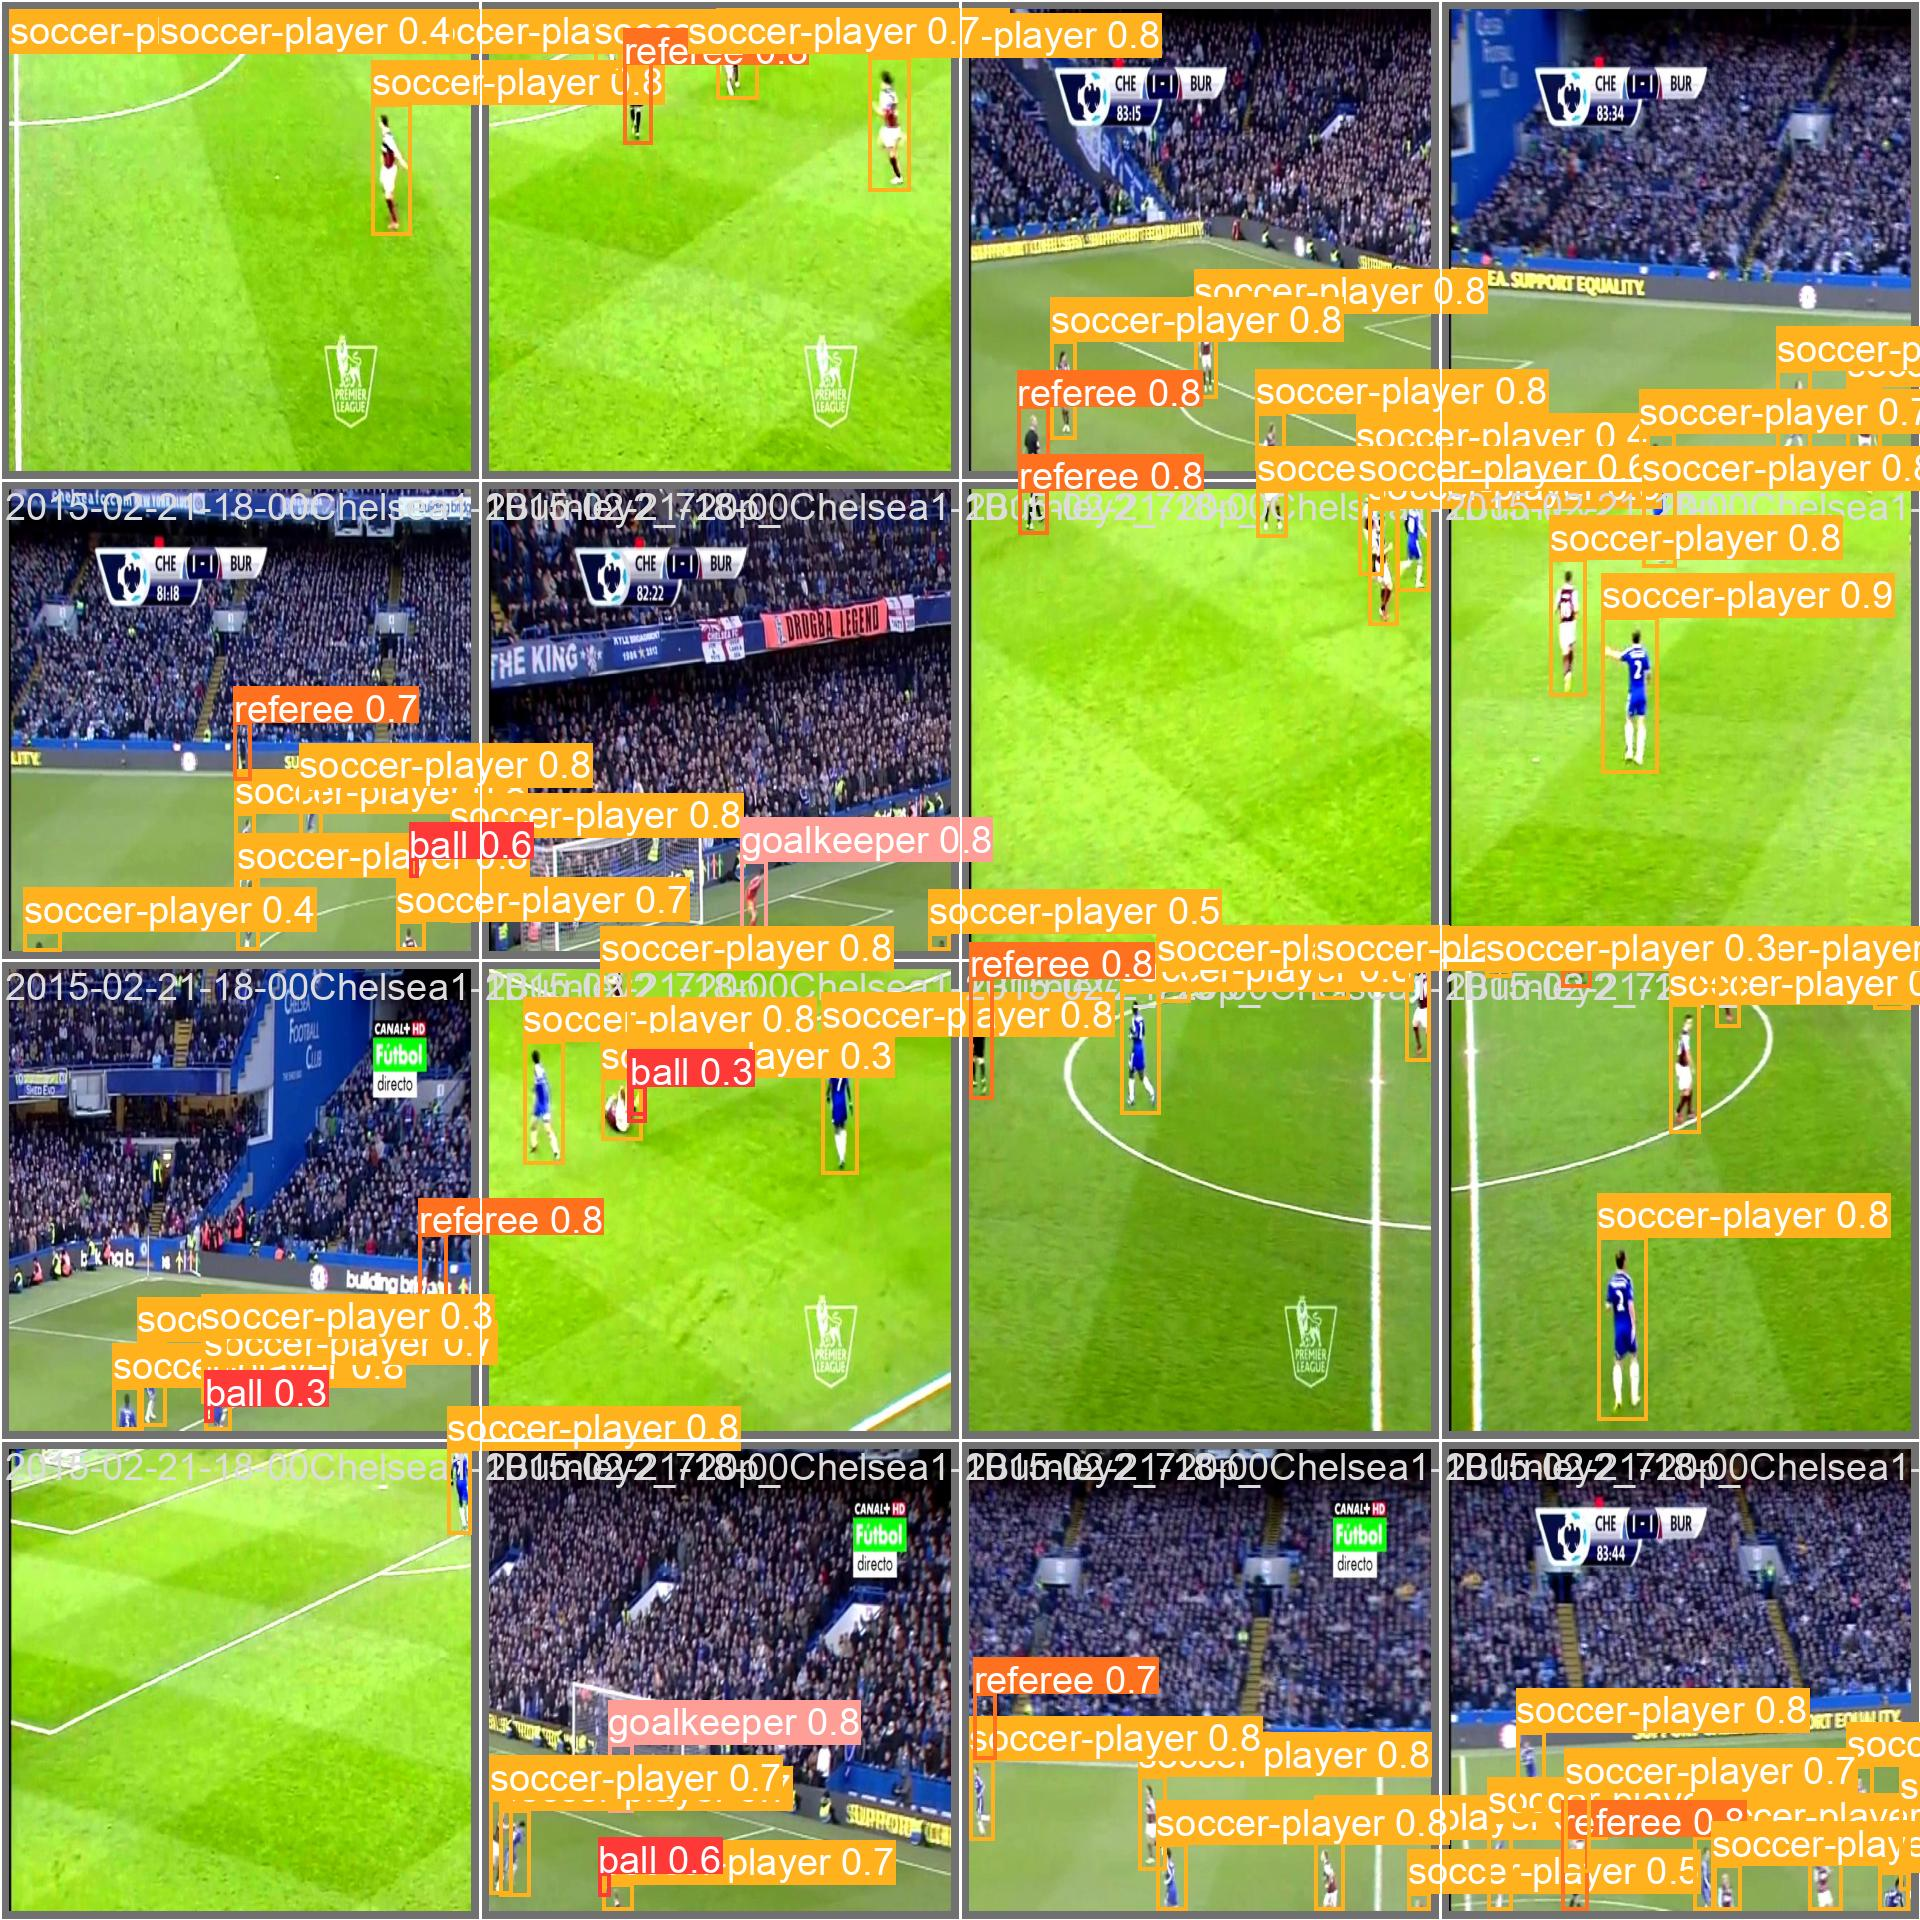

In [ ]:
# Examples of detections on the validation batch
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.3236d2a32881d864c3fd34cf18cde938.jpg: 800x800 1 goalkeeper, 5 soccer-players, 1002.5ms
image 2/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.369ea50ed15a39e7209fa1b79d95b497.jpg: 800x800 1 soccer-player, 1147.2ms
image 3/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.42500c742251d2a66fbce9bd954f1b05.jpg: 800x800 1 soccer-player, 1492.9ms
image 4/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0012_png.rf.7ffc73f9ccc2903042afc93428cbefa7.jpg: 800x800 1 ball, 1 referee, 13 soccer-players, 1495.5ms
image 5/547 /content/datasets/Smart-Football:-Object-Detection-11/test/images/0a2d9b_0_frame0016_png.rf.1f937c2d9c3c5c

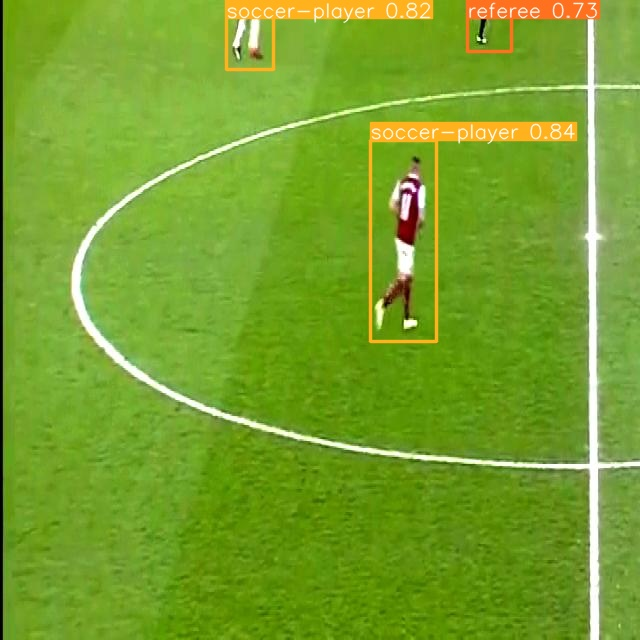

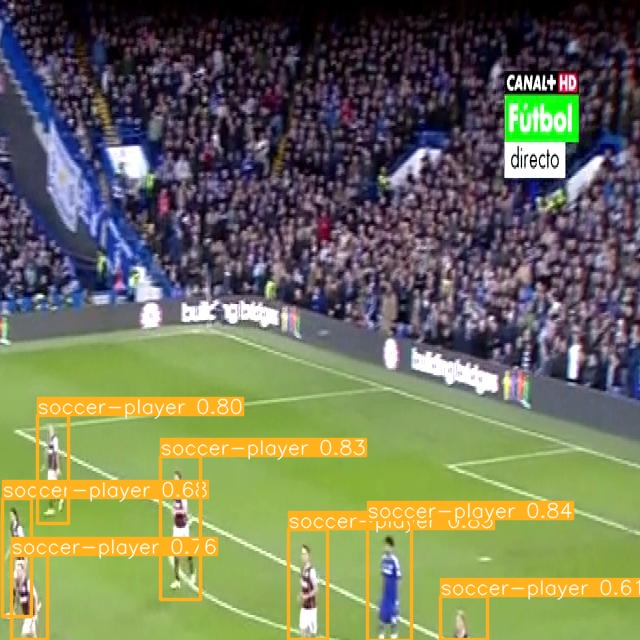

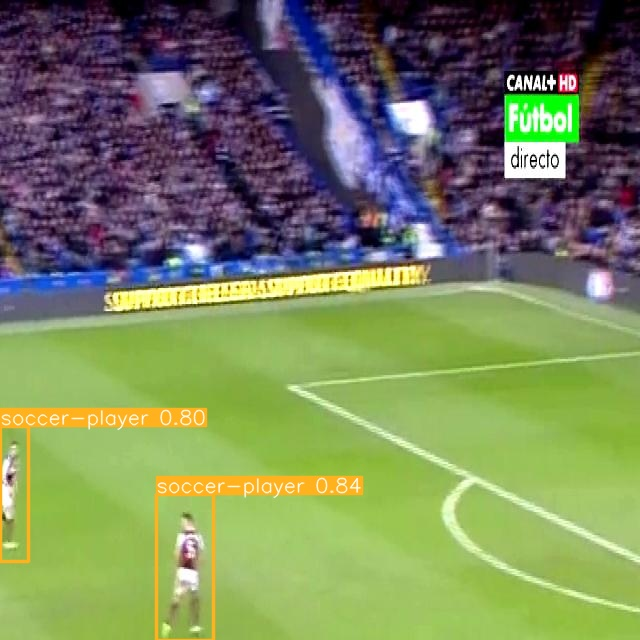

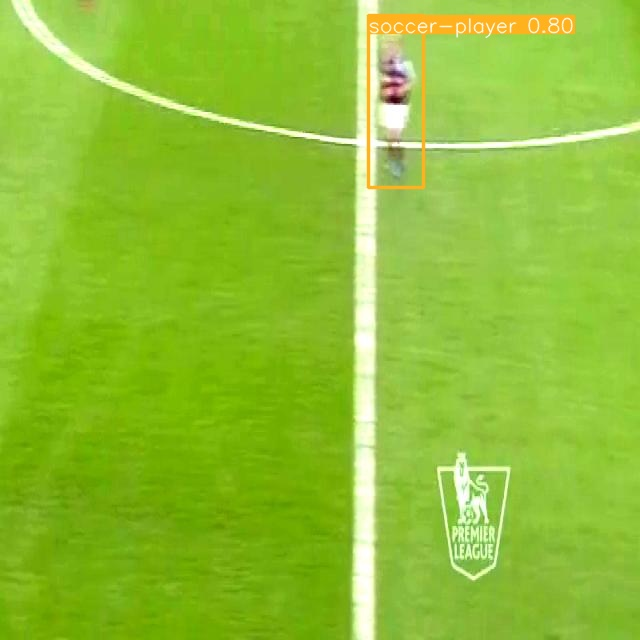

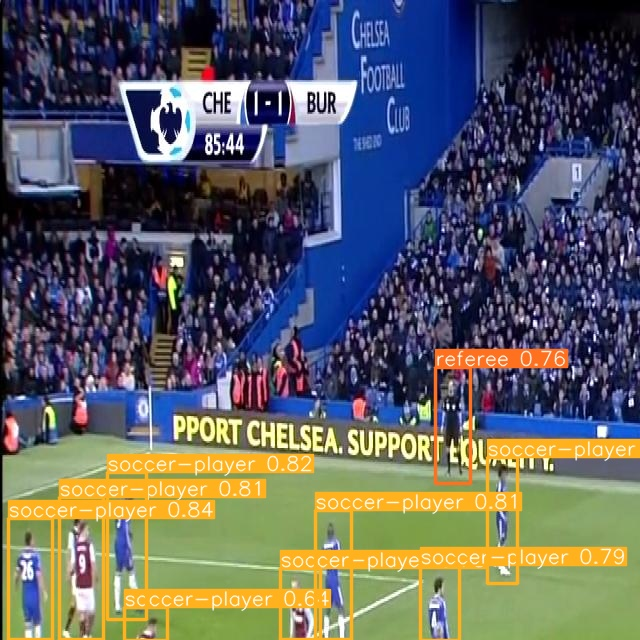

In [ ]:
# visualize predictions on five instances of the test set
import glob

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

# Inference on a video

In [ ]:
from PIL import Image
from ultralytics import YOLO
import cv2

# Load a pretrained YOLOv8n model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Open the video file
cap = cv2.VideoCapture('/content/drive/MyDrive/Smart Football/morocco.mp4')

# Get the frame rate and size
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a video writer
out = cv2.VideoWriter('/content/drive/MyDrive/Smart Football/morocco_res.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Loop over the frames
while cap.isOpened():
    # Read a frame
    ret, frame = cap.read()
    if not ret:
        break

    # Run inference on the frame
    results = model(frame)

    # Plot the results on the frame
    im_array = results[0].plot()

    # Write the frame to the output file
    out.write(im_array)
    # Wait for a key press or end of video
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture, writer and destroy the window
cap.release()
out.release()

Streaming output truncated to the last 5000 lines.
0: 480x800 1 goalkeeper, 1 soccer-player, 15.4ms
Speed: 3.6ms preprocess, 15.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 goalkeepers, 2 soccer-players, 21.2ms
Speed: 3.5ms preprocess, 21.2ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 2 goalkeepers, 1 soccer-player, 23.4ms
Speed: 3.4ms preprocess, 23.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 goalkeeper, 2 soccer-players, 17.3ms
Speed: 5.9ms preprocess, 17.3ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 goalkeeper, 1 soccer-player, 16.3ms
Speed: 3.5ms preprocess, 16.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 goalkeeper, 1 soccer-player, 17.6ms
Speed: 3.6ms preprocess, 17.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 800)

0: 480x800 1 ball, 1 goalkeeper, 1 soccer-player, 16.0ms
Speed:

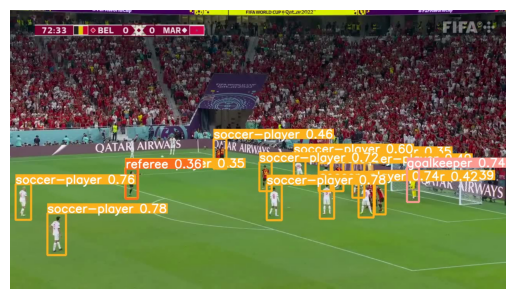

In [ ]:
import cv2
from matplotlib import pyplot as plt

video_path = '/content/drive/MyDrive/Smart Football/morocco_res.mp4'

cap = cv2.VideoCapture(video_path)
cap.set(cv2.CAP_PROP_POS_FRAMES, 40) # Read the 40th frame of the prediction video output

ret, frame = cap.read()

frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

cap.release()